In [1]:
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import seaborn as sns
import numpy as np
root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

from scipy import integrate

In [2]:
df = pd.read_csv(root + '/data/Processed/AllIndiaBulletins_Master.csv')
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

C:\Users\dskcy\AppData\Local\Temp\ipykernel_18316\865087388.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(root + '/data/Processed/AllIndiaBulletins_Master.csv')


C:\Users\dskcy\AppData\Local\Temp\ipykernel_1608\1577837846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['leading_digit'] = df_city['Index Value'].astype(str).str[0:1]


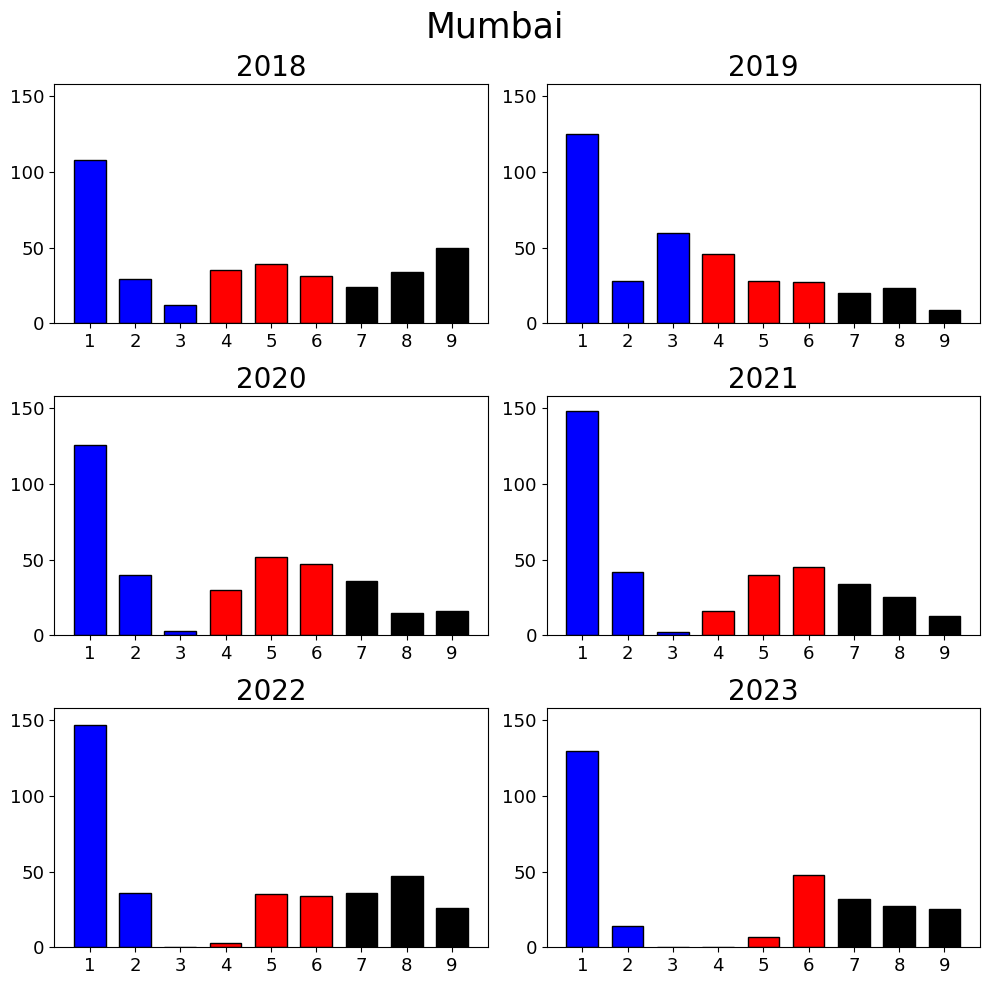

In [256]:

city = 'Mumbai'
df_city = df[df['City']==city]
df_city['leading_digit'] = df_city['Index Value'].astype(str).str[0:1]
max_y = df_city.groupby('year')['leading_digit'].value_counts().max() + 10

fig, axes = plt.subplots(3, 2, figsize=(10,10))
axes = axes.flatten()

for year in [2018, 2019, 2020, 2021, 2022, 2023]:
    df_city_year = df_city[df_city['year']==year]
    N, bins, patches = axes[year-2019].hist(df_city_year['Index Value'].astype(str).str[0:1].astype(int), bins=9, rwidth=0.7, edgecolor='black')
    # Get the positions of the bin centers
    bin_edges = np.histogram_bin_edges(df_city_year['Index Value'].astype(str).str[0:1].astype(int), bins=9)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    ticks = [(patch.get_width() + patch.get_height())/2 for patch in patches]
    ticklabels = [i for i in range(1,10)]

    axes[year-2018].set_title(year, fontsize=20)

    for i in range(0,3):
        patches[i].set_facecolor('b')
    for i in range(3,6):    
        patches[i].set_facecolor('r')
    for i in range(6, len(patches)):
        patches[i].set_facecolor('black')

    axes[year-2018].set_ylim(0, max_y)
    axes[year-2018].set_xticks(bin_centers)
    axes[year-2018].set_xticklabels(ticklabels)

    axes[year-2018].tick_params(axis='both', labelsize=13)


    #axes[year-2019].legend(labels=[str(year-1),str(year)], loc='lower right')

plt.suptitle(city, fontsize=25)
plt.tight_layout()
plt.savefig(root + '/plots/benford/' + city+'_benford.jpg')

# K-s
**Null Hypothesis:** Both samples belong to the same distribution.

Generally, same distribution is not the same "type" of distribution. Even two normal distributions would fail - if their means/stds are different.

But when we do mean normalisation, then even samples from normal distributions with different means and stds would still hold KS test. 

In this case, KS test will reject only when the "type" is different -- normal vs uniform etc.

In [3]:
from scipy.stats import kstest, mannwhitneyu, gaussian_kde

def normalise_array(arr):
    mean = arr.mean()
    std = arr.std()
    max = arr.max()
    min = arr.min()
    arr_normalised = arr - mean
    arr_normalised = arr_normalised/(max-min)
    return arr_normalised

KS Statistic: 1.0
P-value: 0.0
Reject the null hypothesis. Both samples are from different distributions


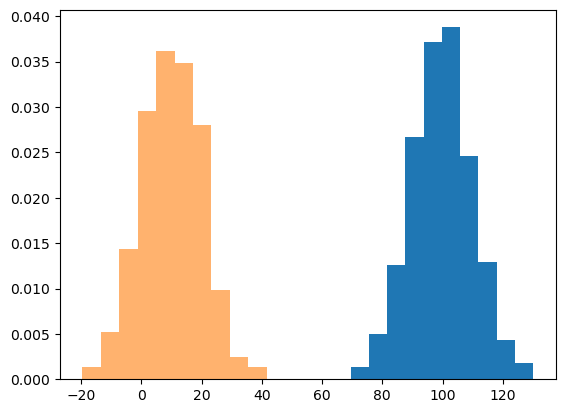

In [114]:
np.random.seed(441)
sample1 = np.random.normal(100, 10, 1000)
#sample2 = np.random.uniform(1, 10, 1000) #np.random.normal(1, 100, 1000)
sample2 =np.random.normal(10, 10, 1000)

#sample1 = np.random.lognormal(0, 0.1, 1000)
#sample2 = np.random.lognormal(0.3, 0.3, 1000)
#sample1 = normalise_array(sample1)
#sample2 = normalise_array(sample2)

ks_statistic, p_value = kstest(sample1, sample2)
# Print the results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. Both samples are from different distributions")
else:
    print("Fail to reject the null hypothesis. Both samples may not be from different distributions")

plt.hist(sample1, density=True)
plt.hist(sample2, density=True, alpha=0.6)
plt.show()


KS Statistic: 0.028
P-value: 0.8282194040312439
Fail to reject the null hypothesis. Both samples may not be from different distributions


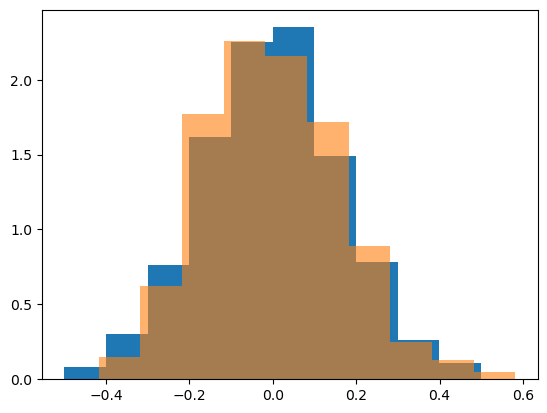

In [139]:
np.random.seed(441)
sample1 = np.random.normal(100, 10, 1000)
#sample2 = np.random.uniform(1, 10, 1000) #np.random.normal(1, 100, 1000)
#sample2 =np.random.normal(100000, 1, 1000)

#sample1 = np.random.lognormal(0, 0.1, 1000)
sample2 = np.random.lognormal(4.7, 0.1, 1000)
sample1 = normalise_array(sample1)
sample2 = normalise_array(sample2)

ks_statistic, p_value = kstest(sample1, sample2)
# Print the results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. Both samples are from different distributions")
else:
    print("Fail to reject the null hypothesis. Both samples may not be from different distributions")

plt.hist(sample1, density=True)
plt.hist(sample2, density=True, alpha=0.6)
plt.show()


In [123]:
sample2

array([ 215.13839655,   29.87831129,   78.25814393,  185.96930913,
         16.81948179,   44.2678299 ,   49.95270448,   34.59403332,
         26.38520716,   77.4904541 ,   87.18246209,  100.80561273,
         74.53002991,  129.06990762,   26.79607406,   59.67040393,
         99.51602962,   35.3014945 ,  128.26552509,   25.52154504,
        176.77383357,   76.30808811,   55.56998728,   73.44769965,
       1295.46142791,   19.40449498,  108.61032155,  213.14808782,
         51.91233347,  103.87618077,   74.83683882,   94.19580287,
        124.9629799 ,   40.93365486,  136.11670244,   81.39768942,
         27.41170933,   43.42656775,  170.93060494,   93.4787073 ,
        407.32393573,   46.86278451,   57.00331114,   58.02152679,
         30.07446593,  180.94373008,  138.045683  ,   22.05788909,
         77.25776166,  211.35807356,    5.80762762,    7.77419112,
         31.71696615,   93.42743142,  658.30148683,    4.89458684,
         17.80958175,   26.79523984,   61.81799251,   49.71154

KS Statistic: 0.12054794520547946
P-value: 0.009886632636607742
Reject the null hypothesis. Both samples are from different distributions


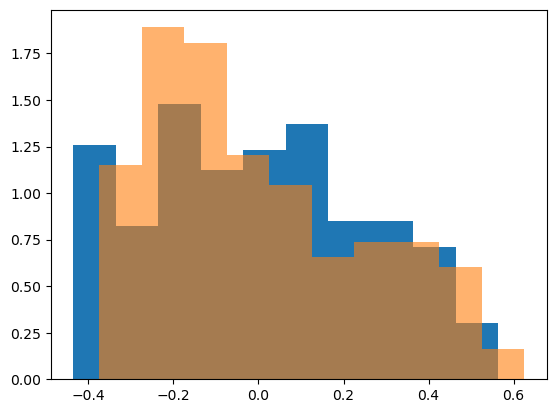

In [140]:
city = 'Delhi'
df_city = df[df['City']==city]
sample1 = df_city[df_city['year']==2018]['Index Value']
sample2 = df_city[df_city['year']==2023]['Index Value']
sample1 = normalise_array(sample1)
sample2 = normalise_array(sample2)

ks_statistic, p_value = kstest(sample1, sample2)
# Print the results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. Both samples are from different distributions")
else:
    print("Fail to reject the null hypothesis. Both samples may not be from different distributions")

plt.hist(sample1, density=True)
plt.hist(sample2, density=True, alpha=0.6)
plt.show()

C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


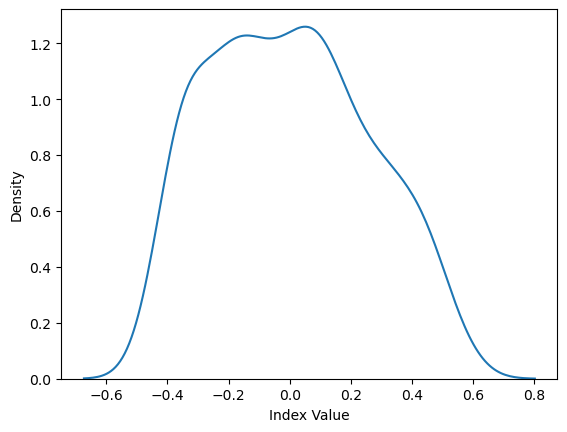

In [110]:
y1 = sns.kdeplot(sample1).get_lines()[0].get_ydata()

C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


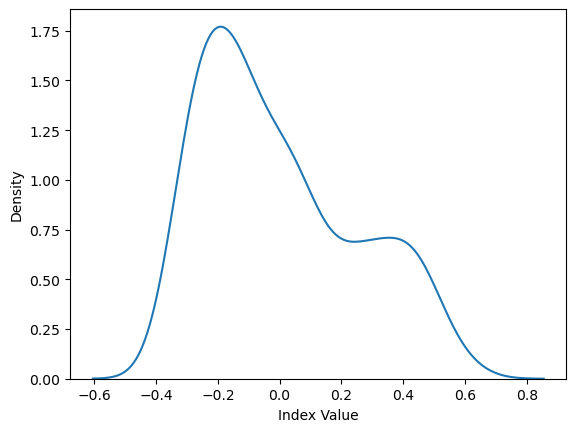

In [111]:
y2 = sns.kdeplot(sample2).get_lines()[0].get_ydata()

In [96]:
non_overlap_area_kde2

12.594627099877426

C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

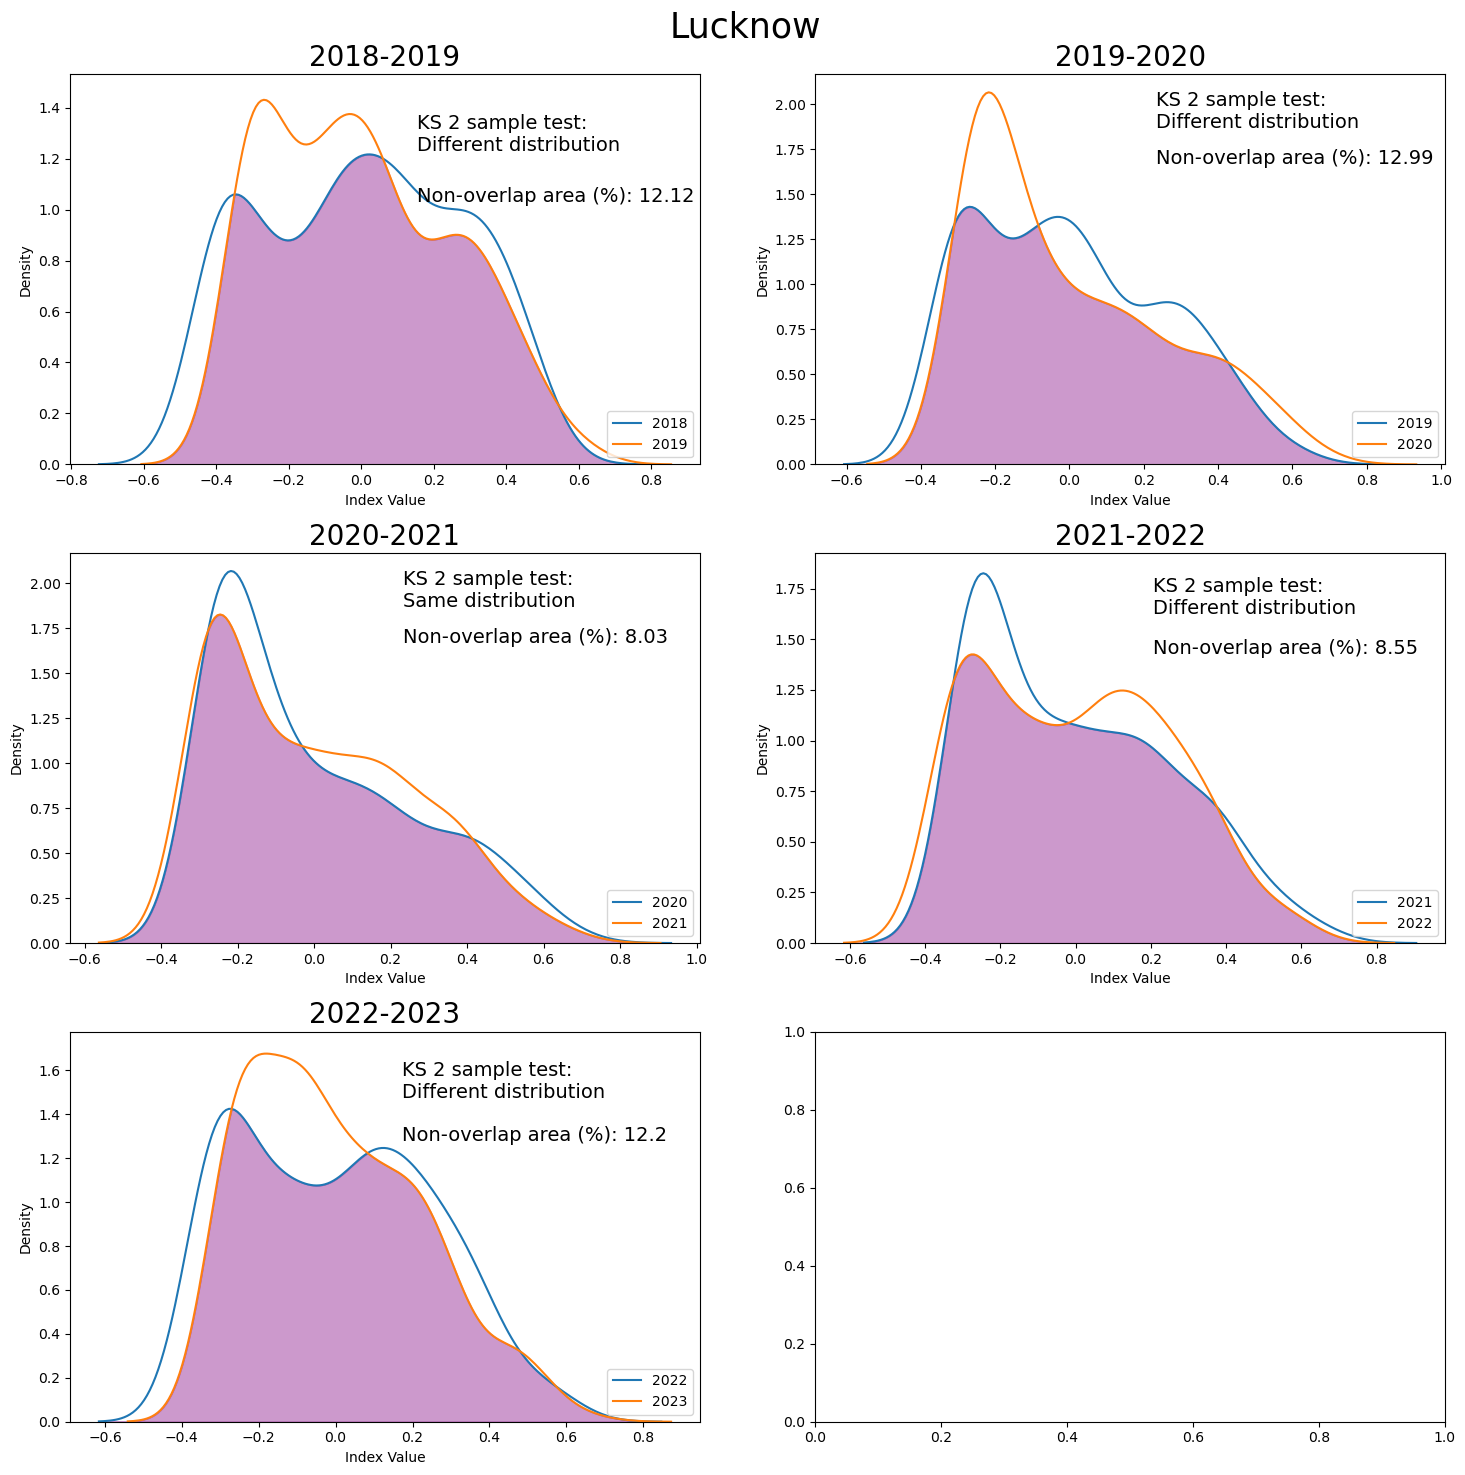

In [55]:
from scipy import integrate

city = 'Lucknow'
df_city = df[df['City']==city]

fig, axes = plt.subplots(3, 2, figsize=(15,15))
axes = axes.flatten()

for year in [2019, 2020, 2021, 2022, 2023]:
    sample1 = df_city[df_city['year']==year-1]['Index Value']
    sample2 = df_city[df_city['year']==year]['Index Value']
    sample1 = normalise_array(sample1)
    sample2 = normalise_array(sample2)
    
    #axes[year-2019].hist(sample1, density=True)
    #axes[year-2019].hist(sample2, density=True, alpha=0.6)
    kde1 = sns.kdeplot(sample1, ax=axes[year-2019])
    x1, y1 = kde1.get_lines()[0].get_data()
    kde2 = sns.kdeplot(sample2, ax=axes[year-2019])
    x2, y2 = kde2.get_lines()[1].get_data()

    # Ensure both KDEs are evaluated over the same x-axis range
    common_x = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 1000)

    # Interpolate KDE values to the common x-axis range
    y1_interp = np.interp(common_x, x1, y1)
    y2_interp = np.interp(common_x, x2, y2)

    # Total area under KDE1 and KDE2
    total_area = 2 # KDE = PDF -- total area under one KDE has to be 1. 
    # Calculate the overlap area by integrating the minimum of both KDE curves
    overlap_area = integrate.simps(np.minimum(y1_interp, y2_interp), common_x)

    non_overlap_area = 100*(total_area - 2*overlap_area)/total_area
    
    ks_statistic, p_value = kstest(sample1, sample2)
    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        KS_interpret = 'Different distribution'
    else:
        KS_interpret = 'Same distribution'

    axes[year-2019].annotate('Non-overlap area (%): '+str(round(non_overlap_area,2)),
                             xy =(max(x1.max(), x2.max())-0.7, max(y1.max(), y2.max())-0.4),
                             fontsize=14)
    axes[year-2019].annotate('KS 2 sample test: \n' + KS_interpret,
                             xy =(max(x1.max(), x2.max())-0.7, max(y1.max(), y2.max())-0.2),
                             fontsize=14)
    
    # Plot the KDEs with overlapping regions shaded
    axes[year-2019].fill_between(common_x, np.minimum(y1_interp, y2_interp), color='purple', alpha=0.4, label='Overlap Area')

    
    axes[year-2019].set_title(str(year-1)+'-'+str(year), fontsize=20)
    axes[year-2019].set_ylim(0, max(y1.max(), y2.max())+0.1)
    axes[year-2019].legend(labels=[str(year-1),str(year)], loc='lower right')

plt.suptitle(city, fontsize=25)
plt.tight_layout()
plt.savefig(root + '/plots/anomalies/' + city+'_yearlycompare.jpg')
plt.show()

C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


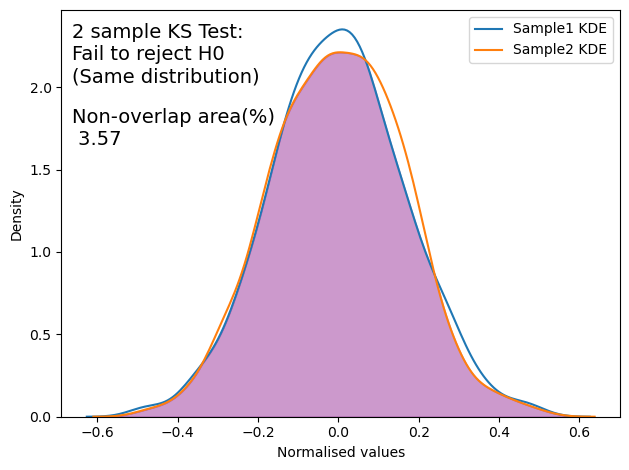

In [193]:
from scipy import integrate

np.random.seed(441)
sample1 = np.random.normal(100, 10, 1000)
#sample2 = np.random.uniform(70, 130, 1000) #np.random.normal(1, 100, 1000)
sample2 =np.random.normal(100, 10, 1000)
sample1 = normalise_array(sample1)
sample2 = normalise_array(sample2)

kde1 = sns.kdeplot(sample1, )
x1, y1 = kde1.get_lines()[0].get_data()
kde2 = sns.kdeplot(sample2, )
x2, y2 = kde2.get_lines()[1].get_data()

# Ensure both KDEs are evaluated over the same x-axis range
common_x = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 1000)

# Interpolate KDE values to the common x-axis range
y1_interp = np.interp(common_x, x1, y1)
y2_interp = np.interp(common_x, x2, y2)

# Total area under KDE1 and KDE2
total_area = 2 # KDE = PDF -- total area under one KDE has to be 1. 
# Calculate the overlap area by integrating the minimum of both KDE curves
overlap_area = integrate.simps(np.minimum(y1_interp, y2_interp), common_x)

non_overlap_area = 100*(total_area - 2*overlap_area)/total_area

ks_statistic, p_value = kstest(sample1, sample2)
# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    KS_interpret = 'Reject H0 \nDifferent distribution'
else:
    KS_interpret = 'Fail to reject H0 \n(Same distribution)'

plt.annotate('Non-overlap area(%) \n '+str(round(non_overlap_area,2)),
                         xy =(max(x1.max(), x2.max())-1.3, max(y1.max(), y2.max())-0.7),
                         fontsize=14)
plt.annotate('2 sample KS Test: \n' + KS_interpret,
                         xy =(max(x1.max(), x2.max())-1.3, max(y1.max(), y2.max())-0.32),
                         fontsize=14)

# Plot the KDEs with overlapping regions shaded
plt.fill_between(common_x, np.minimum(y1_interp, y2_interp), color='purple', alpha=0.4, label='Overlap Area')
plt.xlabel('Normalised values')
plt.legend(['Sample1 KDE', 'Sample2 KDE'], loc='upper right')
plt.tight_layout()
plt.savefig(root + '/plots/' +'nonoverlap.jpg')

In [16]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

areas = []
for i in tqdm(range(0,10000)):
    sample1 = np.random.normal(100, 10, 1000)
    #sample2 = np.random.uniform(70, 130, 1000) #np.random.normal(1, 100, 1000)
    sample2 =np.random.normal(100, 10, 1000)
    sample1 = normalise_array(sample1)
    sample2 = normalise_array(sample2)
    
    kde1 = sns.kdeplot(sample1, )
    x1, y1 = kde1.get_lines()[0].get_data()
    kde2 = sns.kdeplot(sample2, )
    x2, y2 = kde2.get_lines()[1].get_data()
    
    # Ensure both KDEs are evaluated over the same x-axis range
    common_x = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 1000)
    
    # Interpolate KDE values to the common x-axis range
    y1_interp = np.interp(common_x, x1, y1)
    y2_interp = np.interp(common_x, x2, y2)
    
    # Total area under KDE1 and KDE2
    total_area = 2 # KDE = PDF -- total area under one KDE has to be 1. 
    # Calculate the overlap area by integrating the minimum of both KDE curves
    overlap_area = integrate.simps(np.minimum(y1_interp, y2_interp), common_x)
    
    non_overlap_area = 100*(total_area - 2*overlap_area)/total_area
    plt.close()

    areas.append(non_overlap_area)


100%|██████████| 10000/10000 [06:05<00:00, 27.38it/s]


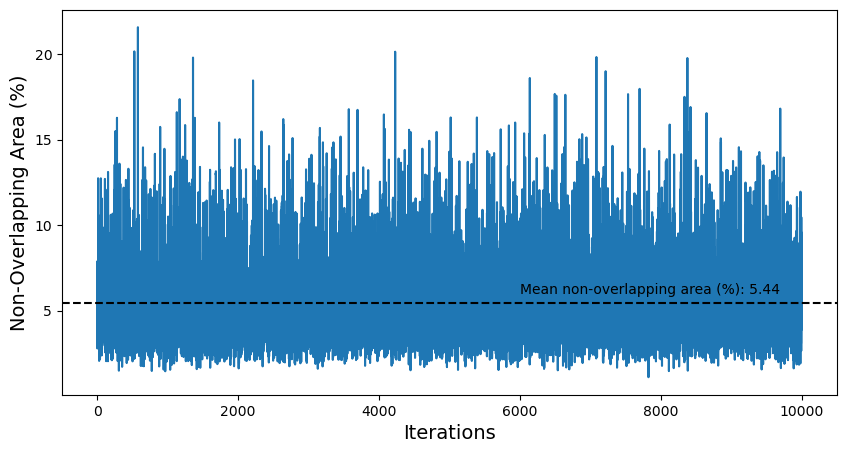

In [37]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.plot(range(0,10000), areas)
plt.axhline(np.array(areas).mean(), color='black', linestyle='--')
plt.annotate('Mean non-overlapping area (%): '+str(round(np.array(areas).mean(), 2)), xy=(6000,6))
plt.ylabel('Non-Overlapping Area (%)', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.savefig(root + '/plots/' +'montecarlo_nonoverlappingarea.jpg')

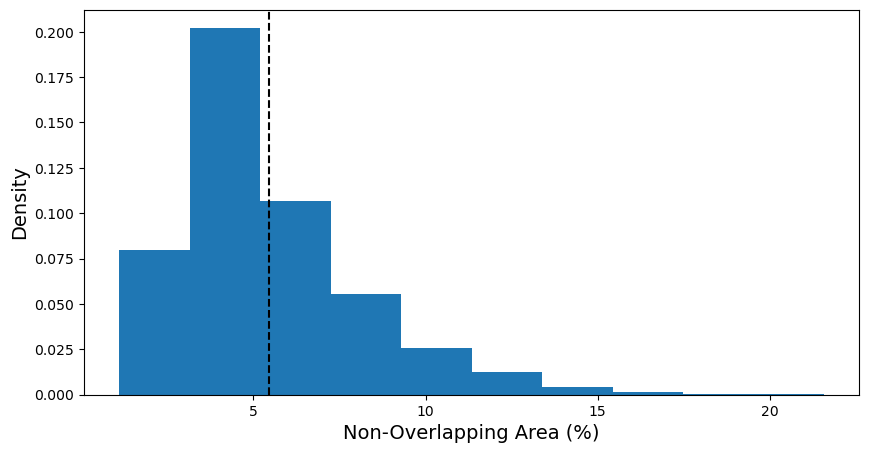

In [41]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.hist(areas, bins=10, density=True)
plt.axvline(np.array(areas).mean(), color='black', linestyle='--')
plt.xlabel('Non-Overlapping Area (%)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.annotate('Mean non-overlapping area (%): '+str(round(np.array(areas).mean(), 2)), xy=(5.5,2300))

plt.savefig(root + '/plots/' +'montecarlo_nonoverlappingarea_histogram.jpg')